In [1]:
import pennylane as qml
from pennylane import numpy as np

## I.11.1

Concept: basis states for multi-qubit systems

In [ ]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE BASIS STATE

    if (basis_id >> 0) % 2 == 1:
        qml.PauliX(wires=2)
    if (basis_id >> 1) % 2 == 1:
        qml.PauliX(wires=1)
    if (basis_id >> 2) % 2 == 1:
        qml.PauliX(wires=0)

    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")


## I.11.2

Concept: separable states

In [ ]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(wires=0)), qml.expval(qml.PauliZ(wires=1))


print(two_qubit_circuit())


## I.11.3

In [ ]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(0)
    qml.PauliX(1)
    qml.Hadamard(1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())


## I.11.4

In [ ]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################

    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)
    a = qml.expval(qml.PauliZ(wires=0) @ qml.Identity(wires=1))
    b = qml.expval(qml.Identity(wires=0) @ qml.PauliZ(wires=1))
    
    return a, b


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    ##################
    # YOUR CODE HERE #
    ##################

    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)

    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliZ(wires=1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(len(ZI_results)):
        combined_results[i] = ZI_results[i] * IZ_results[i]

    return combined_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)


This image seems to have been generated by Matplotlib; implement `plotter` to produce this.

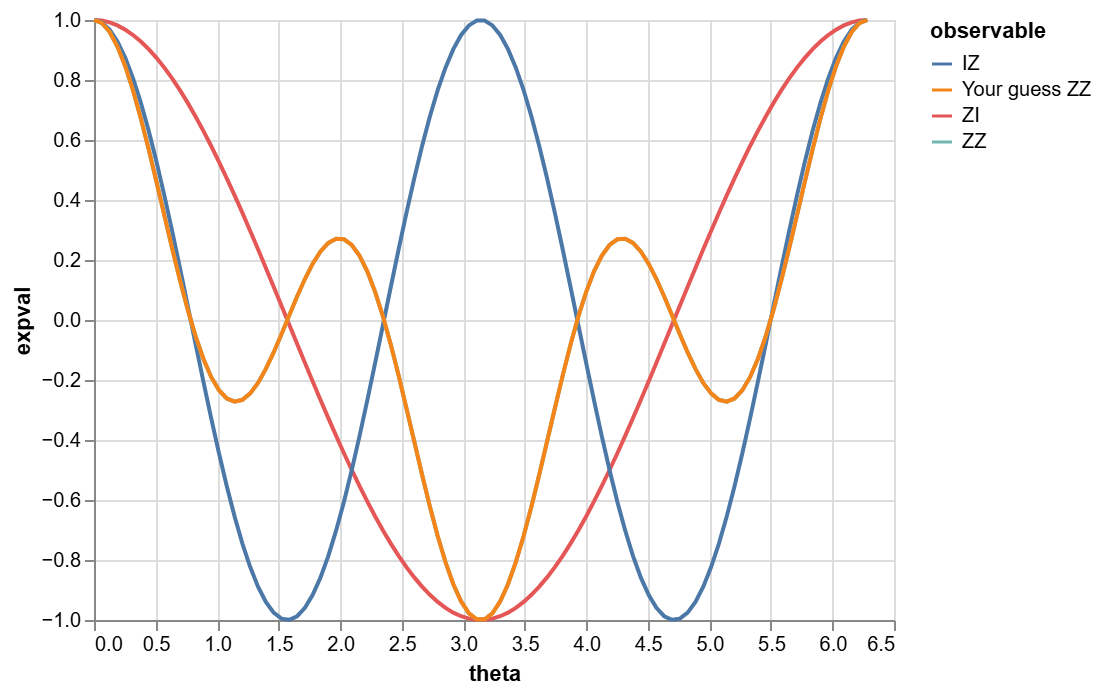